In [ ]:
import pandas as pd, requests
from pandas import Series,DataFrame
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
 
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (20, 20)


Loading Dataset

In [ ]:
ds1=pd.read_csv('safecity_reports_07082019.csv')

In [ ]:
ds1.head()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,Touching /Groping,Catcalls/Whistles,Sexual Invites,Stalking,Others,Commenting,Rape / Sexual Assault,North East India Report,Indecent Exposure/Masturbation in public,Chain Snatching,Ogling/Facial Expressions/Staring,Taking pictures,Poor / No Street Lighting,Online Harassment,Human Trafficking,Petty Robbery,NUMBER_CAT,ADDRESS,POSITION,COUNTRY,STATE,COUNTY,LABEL,CITY,DISTRICT,STREET
0,12152,touching,2019-05-27 15:00:00,"Chanakya Puri, Danapur Nizamat, Patna, Bihar 8...",My school auto driver always use to stare at m...,"Touching /Groping,",25.625485,85.055803,NaN,2019,5,27,15.0,Monday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Gola Road, Danapur Cantt, Danapur 8...","{'Latitude': 25.6254853, 'Longitude': 85.0558015}",India,Bihar,Patna,"Gola Road, Danapur Cantt, Danapur 800012, India",Danapur,Danapur Cantt,Gola Road
1,12149,whistling,2019-05-17 19:00:00,"Near Nissan Showroom, Bailey Rd, Patna, Bihar ...",I was in market with my mom. There I saw a man...,"Catcalls/Whistles,",25.619769,85.045596,NaN,2019,5,17,19.0,Friday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Danapur Cantt, Danapur 801503, Indi...","{'Latitude': 25.6198029, 'Longitude': 85.045621}",India,Bihar,Patna,"Danapur Cantt, Danapur 801503, India",Danapur,Danapur Cantt,NaN
2,12213,sexual invite,2019-05-15 15:03:00,"Makina, Nairobi, Kenya",there is a girl whom boys have been writing a ...,"Sexual Invites,",-1.308482,36.789595,NaN,2019,5,15,15.0,Wednesday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Nairobi, Kenya', 'Country': 'KEN', ...","{'Latitude': -1.3083893, 'Longitude': 36.7896921}",Kenya,Nairobi,Nairobi,"Nairobi, Kenya",Nairobi,Makina Estate,NaN
3,12199,sexual invite,2019-05-14 14:13:00,"Makina, Nairobi, Kenya",there is a girl who is being disturbed y a bo...,"Sexual Invites,",-1.308482,36.789595,NaN,2019,5,14,14.0,Tuesday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Nairobi, Kenya', 'Country': 'KEN', ...","{'Latitude': -1.3083893, 'Longitude': 36.7896921}",Kenya,Nairobi,Nairobi,"Nairobi, Kenya",Nairobi,Makina Estate,NaN
4,12206,sexual invite,2019-05-13 14:45:00,"Makina, Nairobi, Kenya",there are some boys who likes disturbing a gir...,"Sexual Invites,",-1.308482,36.789595,NaN,2019,5,13,14.0,Monday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Nairobi, Kenya', 'Country': 'KEN', ...","{'Latitude': -1.3083893, 'Longitude': 36.7896921}",Kenya,Nairobi,Nairobi,"Nairobi, Kenya",Nairobi,Makina Estate,NaN


In [ ]:
ds1.tail()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,Touching /Groping,Catcalls/Whistles,Sexual Invites,Stalking,Others,Commenting,Rape / Sexual Assault,North East India Report,Indecent Exposure/Masturbation in public,Chain Snatching,Ogling/Facial Expressions/Staring,Taking pictures,Poor / No Street Lighting,Online Harassment,Human Trafficking,Petty Robbery,NUMBER_CAT,ADDRESS,POSITION,COUNTRY,STATE,COUNTY,LABEL,CITY,DISTRICT,STREET
1305,10634,street market sexual harassment report,2016-10-16 17:00:00,"Khar West, Mumbai, Maharashtra, India",This survey is carried out by safecity (Red Do...,"Catcalls/Whistles, Ogling/Facial Expressions/S...",19.064104,72.834871,NaN,2016,10,16,17.0,Sunday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,"{'Label': 'Vitthalbhai Patel Road, Bandra West...","{'Latitude': 19.0641176, 'Longitude': 72.8349043}",India,Maharashtra,Mumbai Suburban,"Vitthalbhai Patel Road, Bandra West, Mumbai 40...",Mumbai,Bandra West,Vitthalbhai Patel Road
1306,10633,street market sexual harassment report,2016-12-23 13:00:00,"Khar West, Mumbai, Maharashtra, India",This survey is carried out by safecity (Red Do...,"Catcalls/Whistles, Commenting, Ogling/Facial E...",19.064185,72.834833,NaN,2016,12,23,13.0,Friday,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,"{'Label': 'Vitthalbhai Patel Road, Bandra West...","{'Latitude': 19.0642003, 'Longitude': 72.8348706}",India,Maharashtra,Mumbai Suburban,"Vitthalbhai Patel Road, Bandra West, Mumbai 40...",Mumbai,Bandra West,Vitthalbhai Patel Road
1307,10632,street market sexual harassment report,2016-12-17 15:00:00,"Radha Narayan Building, Radha Narayan, Waterfi...",This survey is carried out by safecity (Red Do...,"Catcalls/Whistles, Commenting, Ogling/Facial E...",19.063663,72.835053,NaN,2016,12,17,15.0,Saturday,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,"{'Label': 'Pro V G Rao Chowk, Bandra West, Mum...","{'Latitude': 19.0636976, 'Longitude': 72.8350502}",India,Maharashtra,Mumbai Suburban,"Pro V G Rao Chowk, Bandra West, Mumbai 400050,...",Mumbai,Bandra West,Pro V G Rao Chowk
1308,10631,street market sexual harassment report,2016-12-14 15:00:00,"National College Bus Stop, Waterfield Road, Kh...",This survey is carried out by safecity (Red Do...,"Commenting,",19.063556,72.835075,NaN,2016,12,14,15.0,Wednesday,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"{'Label': 'Vitthalbhai Patel Road, Bandra West...","{'Latitude': 19.0636, 'Longitude': 72.83512}",India,Maharashtra,Mumbai Suburban,"Vitthalbhai Patel Road, Bandra West, Mumbai 40...",Mumbai,Bandra West,Vitthalbhai Patel Road
1309,10630,street market sexual harassment report,2017-01-22 13:00:00,"Radha Narayan Building, Radha Narayan, Waterfi...",This survey is carried out by safecity (Red Do...,"Poor / No Street Lighting,",19.063698,72.835021,NaN,2017,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   #                                         1310 non-null   int64  
 1   INCIDENT TITLE                            1310 non-null   object 
 2   INCIDENT DATE                             1310 non-null   object 
 3   LOCATION                                  1310 non-null   object 
 4   DESCRIPTION                               1305 non-null   object 
 5   CATEGORY                                  1310 non-null   object 
 6   LATITUDE                                  1310 non-null   float64
 7   LONGITUDE                                 1310 non-null   float64
 8   More Info                                 0 non-null      float64
 9   YEAR                                      1310 non-null   int64  
 10  MONTH                               

Removing Irregularity from the column


In [ ]:
# new data frame with split value columns 
ds1['CATEGORY']= ds1['CATEGORY'].str.split(",", n = 1, expand = True) 

# df display 
ds1.tail()

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,More Info,YEAR,MONTH,DAY,HOUR,DAYOFWEEK,Touching /Groping,Catcalls/Whistles,Sexual Invites,Stalking,Others,Commenting,Rape / Sexual Assault,North East India Report,Indecent Exposure/Masturbation in public,Chain Snatching,Ogling/Facial Expressions/Staring,Taking pictures,Poor / No Street Lighting,Online Harassment,Human Trafficking,Petty Robbery,NUMBER_CAT,ADDRESS,POSITION,COUNTRY,STATE,COUNTY,LABEL,CITY,DISTRICT,STREET
11198,5892,Commenting,2017-11-09 19:29:00,"Jahangirpuri Rd, Ramgarh, Ramgarh Village, Jah...",NaN,Others,28.73213,77.16031,NaN,2017,11,9,19,Thursday,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,"{'Label': 'Jahangir Puri Road, Ramgarh-Block A...","{'Latitude': 28.73213, 'Longitude': 77.16031}",India,Delhi,North West,"Jahangir Puri Road, Ramgarh-Block A, Jahangirp...",Delhi,Jahangirpuri,Jahangir Puri Road
11199,5886,Touching and grouping at Goregaon station,2017-09-12 00:00:00,"Goregaon Railway Foot Over Bridge 1, Goregaon ...",NaN,Touching /Groping,19.16446,72.84015,NaN,2017,9,12,0,Tuesday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"{'Label': '1, Goregaon West, Mumbai 400062, In...","{'Latitude': 19.16446, 'Longitude': 72.84015}",India,Maharashtra,Mumbai Suburban,"1, Goregaon West, Mumbai 400062, India",Mumbai,Goregaon West,NaN
11200,5884,"Commenting, Stalking and etc at Goregaon",2017-10-03 10:00:00,"Shakti Niwas, Station Rd, Jawahar Nagar, Goreg...",NaN,Stalking,19.16498,72.84730,NaN,2017,10,3,10,Tuesday,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,4,"{'Label': 'Station Road, Goregaon West, Mumbai...","{'Latitude': 19.16498, 'Longitude': 72.8473}",India,Maharashtra,Mumbai Suburban,"Station Road, Goregaon West, Mumbai 400062, India",Mumbai,Goregaon West,Station Road
11201,5883,Comments and stalking at Goregaon railway station,2017-09-29 00:00:00,"Shakti Niwas, Station Rd, Jawahar Nagar, Goreg...",NaN,Commenting,19.16498,72.84730,NaN,2017,9,29,0,Friday,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,"{'Label': 'Station Road, Goregaon West, Mumbai...","{'Latitude': 19.16498, 'Longitude': 72.8473}",India,Maharashtra,Mumbai Suburban,"Station Road, Goregaon West, Mumbai 400062, India",Mumbai,Goregaon West,Station Road
11202,1,Commenting,2017-09-11 21:00:00,"Sub. City Center, Sector 34A, Sector 34, Chand...",NaN,Human Trafficking,30.71972,76.76570,NaN,2017,9,11,21,Monday,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,1,9,"{'Label': 'Sector 34, Chandigarh, CH, India', ...","{'Latitude': 30.71972, 'Longitude': 76.7657}",India,Chandigarh,Chandigarh,"Sector 34, Chandigarh, CH, India",Chandigarh,Sector 34,NaN


Removing Unnecessary columns

In [ ]:
ds1 = ds1.drop(['More Info','Touching /Groping','Catcalls/Whistles','Sexual Invites','Stalking','Others','Commenting','Rape / Sexual Assault','North East India Report','Indecent Exposure/Masturbation in public','Chain Snatching','Ogling/Facial Expressions/Staring','Taking pictures','Poor / No Street Lighting','Online Harassment','Human Trafficking','Petty Robbery','ADDRESS','POSITION','LABEL','STREET','YEAR','MONTH','DAY','HOUR'], axis =1)

In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #               1310 non-null   int64  
 1   INCIDENT TITLE  1310 non-null   object 
 2   INCIDENT DATE   1310 non-null   object 
 3   LOCATION        1310 non-null   object 
 4   DESCRIPTION     1305 non-null   object 
 5   CATEGORY        1310 non-null   object 
 6   LATITUDE        1310 non-null   float64
 7   LONGITUDE       1310 non-null   float64
 8   DAYOFWEEK       1309 non-null   object 
 9   NUMBER_CAT      1309 non-null   float64
 10  COUNTRY         1309 non-null   object 
 11  STATE           1309 non-null   object 
 12  COUNTY          1309 non-null   object 
 13  CITY            1308 non-null   object 
 14  DISTRICT        1226 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 153.6+ KB


Explolatory Data Analysis  

In [ ]:
#-------------------Country-----------------

In [ ]:
ds1['COUNTRY'].value_counts()

India             8451
Nepal             1350
Kenya             1328
United States       22
Philippines         15
Nigeria             12
United Kingdom       6
France               3
South Africa         3
Bharat               3
Suisse               2
Malaysia             2
Tanzania             1
Canada               1
Bangladesh           1
Deutschland          1
Magyarország         1
Argentina            1
Name: COUNTRY, dtype: int64

Text(0.5, 1.0, 'No. of Incidents per country\n')

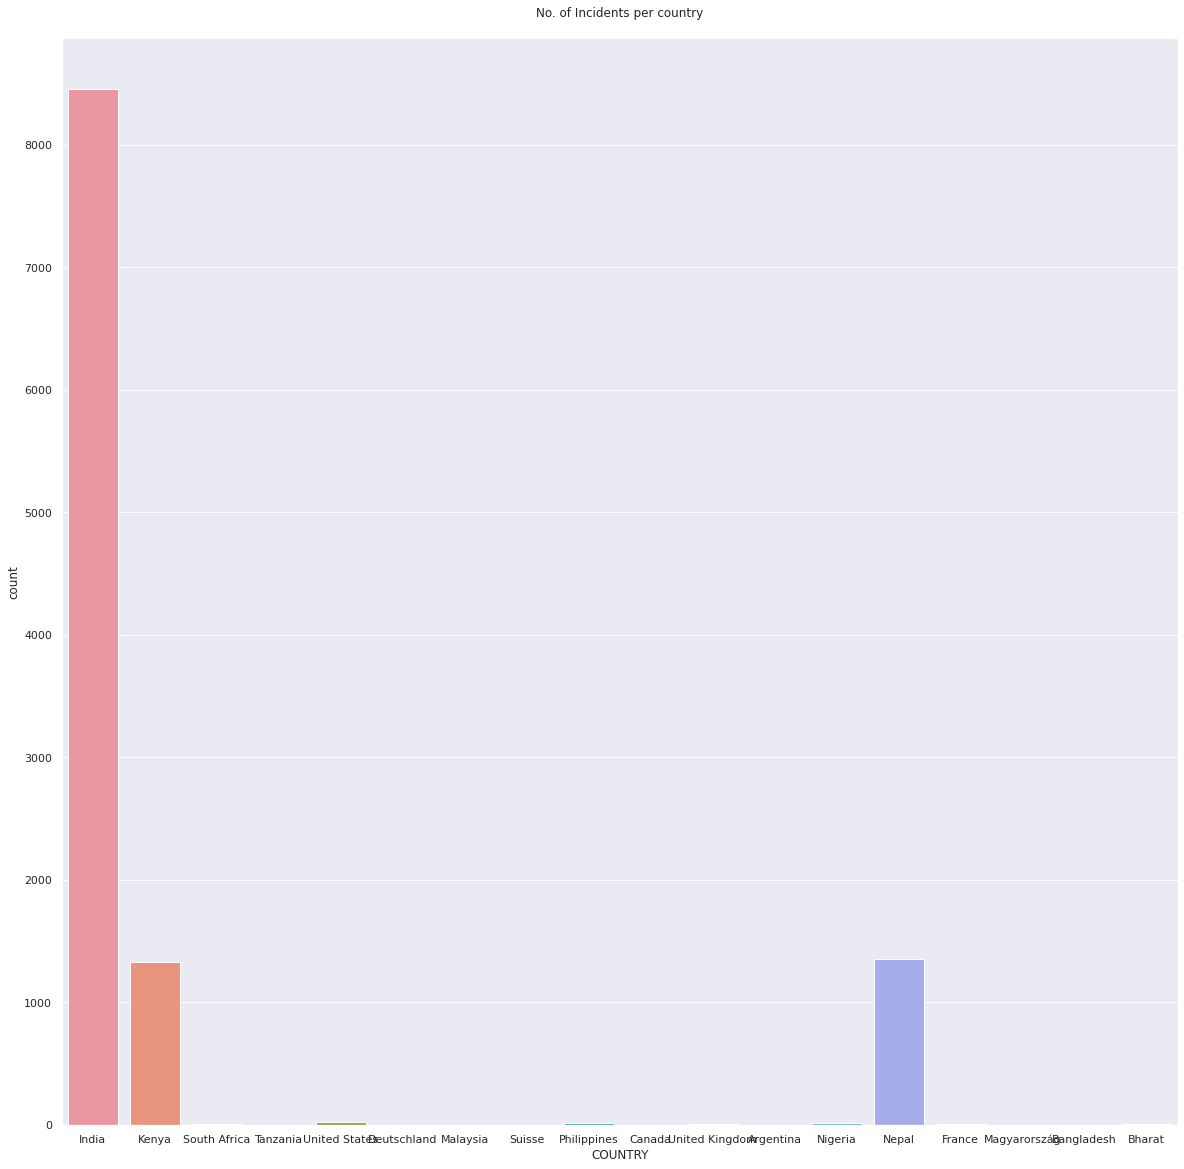

In [ ]:
sns.countplot(x=ds1['COUNTRY'],data=ds1)
plt.title('No. of Incidents per country\n')

In [ ]:
#---------------------State----------------

In [ ]:
new = ds1[ds1['COUNTRY'] == "India"] 

In [ ]:
new['STATE'].value_counts()

Delhi                     4138
Maharashtra               2659
Chandigarh                 365
Uttar Pradesh              274
Bihar                      236
Haryana                    115
Karnataka                  115
Gujarat                     99
Rajasthan                   64
Tamil Nadu                  63
West Bengal                 52
Telangana                   46
Kerala                      42
Goa                         39
Madhya Pradesh              33
Uttarakhand                 23
Punjab                      15
Andhra Pradesh              14
Assam                       13
Odisha                      13
Himachal Pradesh            11
Jharkhand                   10
Chhattisgarh                 5
Daman & Diu                  2
Manipur                      2
Puducherry                   2
Dadra and Nagar Haveli       1
Name: STATE, dtype: int64

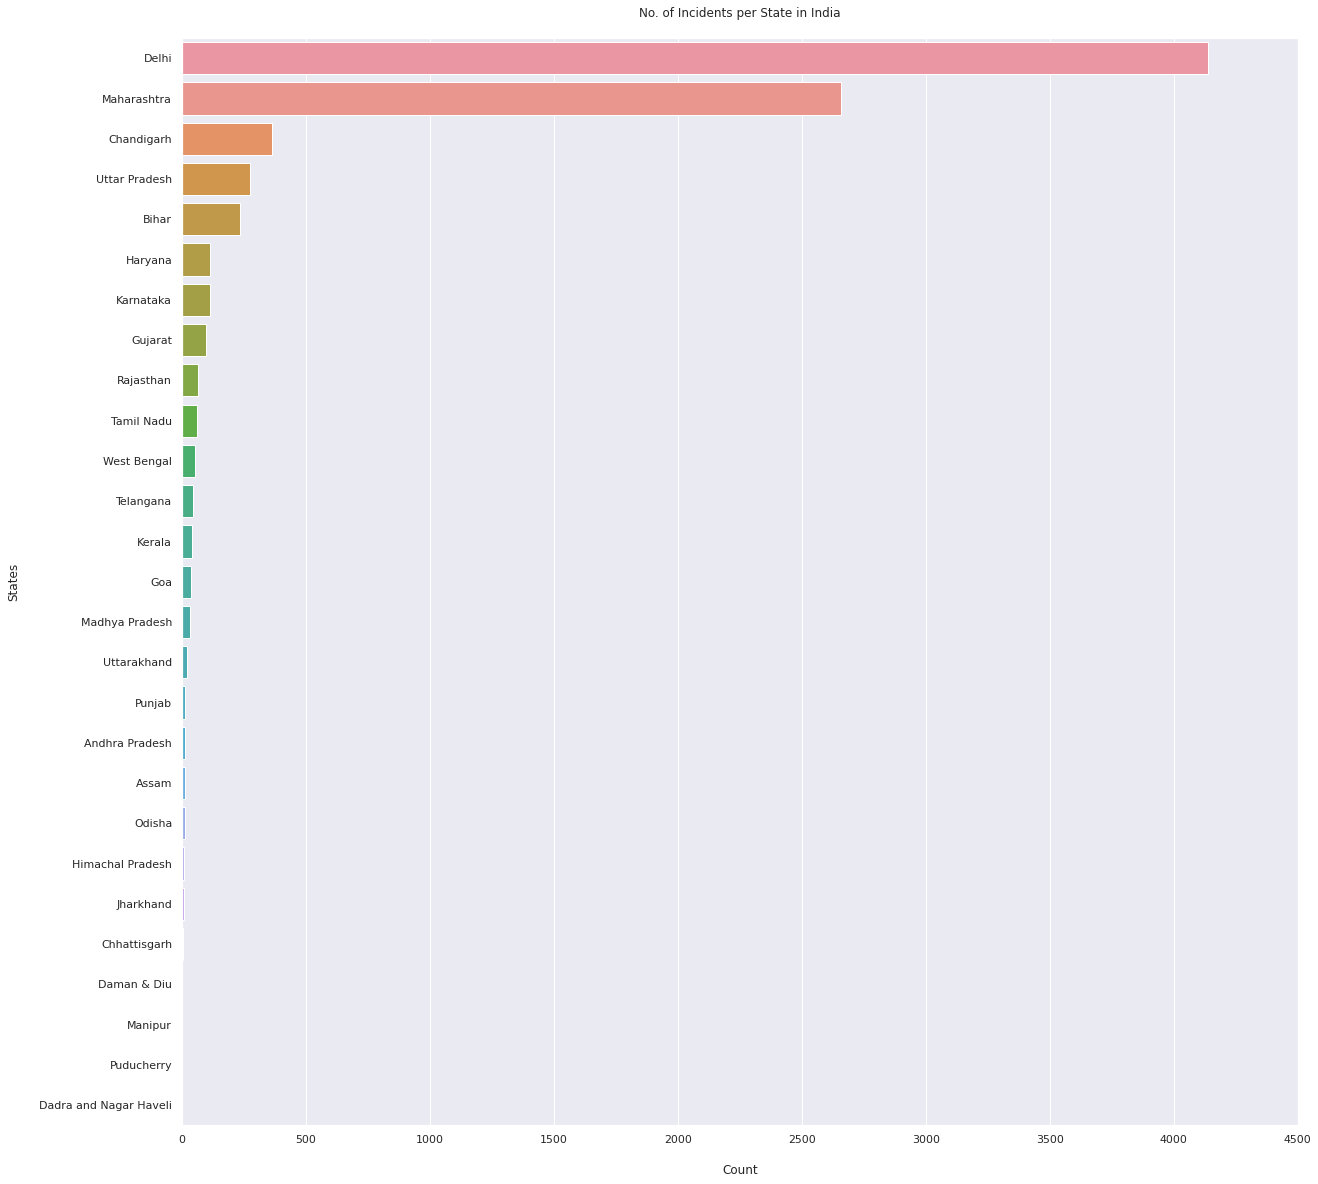

In [ ]:
data=new['STATE'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,4500])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of Incidents per State in India\n')
plt.xlabel("\nCount")
plt.ylabel('States\n')


    
plt.show()



In [ ]:
#-----------------CITY------------

In [ ]:
ct = new[new['STATE'] == "Delhi"] 

ct2 = new[new['STATE'] == "Maharashtra"] 

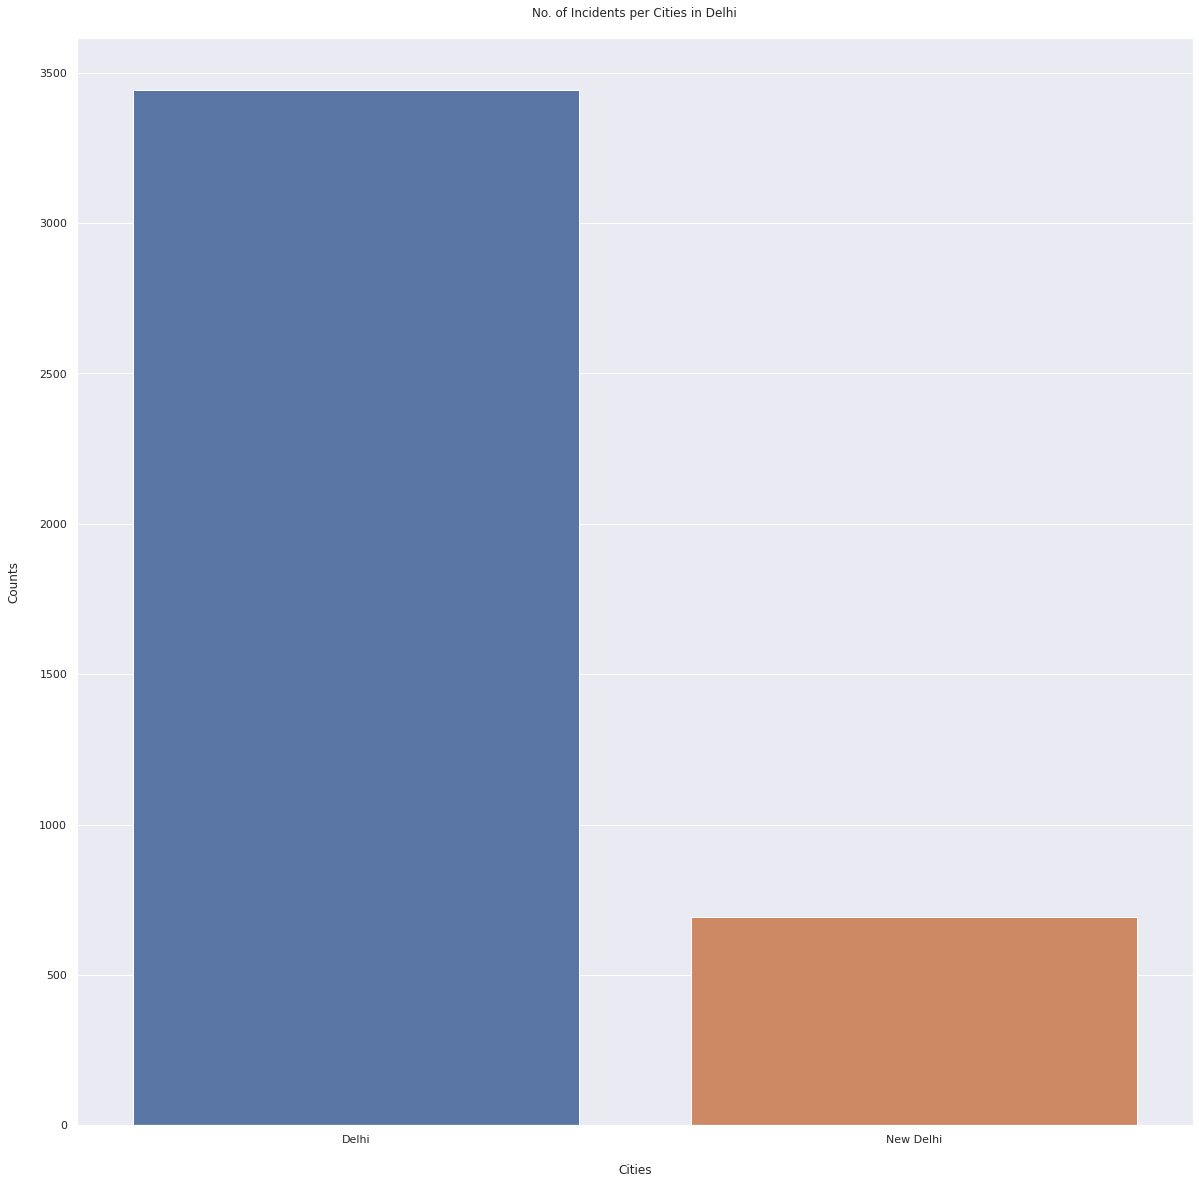

In [ ]:
data=ct['CITY'].value_counts()

sns.barplot(x=data.index, y=data)
plt.title('No. of Incidents per Cities in Delhi\n')
plt.xlabel("\nCities")
plt.ylabel('Counts\n')


    
plt.show()

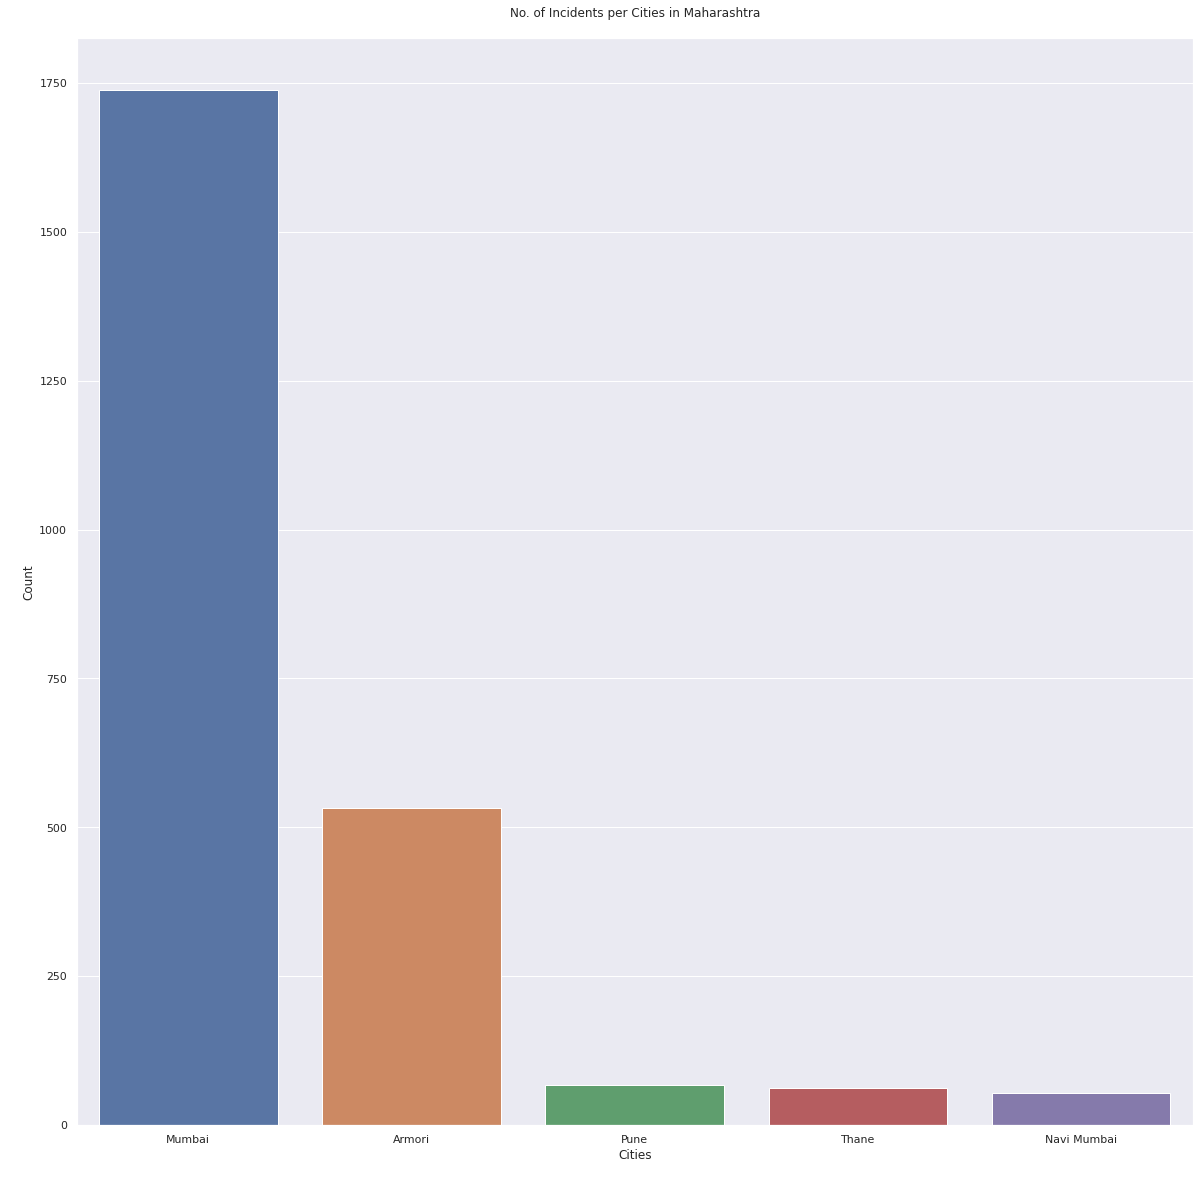

In [ ]:
data=ct2['CITY'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,2000])

sns.barplot(x=data.index[:5], y=data[:5])
plt.title('No. of Incidents per Cities in Maharashtra\n')
plt.ylabel("\nCount")
plt.xlabel('Cities\n')


    
plt.show()

In [ ]:
#-----------------------District--------------------

In [ ]:
dis1 = ct[ct['CITY'] == "Delhi"] 

Text(0.5, 0, 'Cities\n')

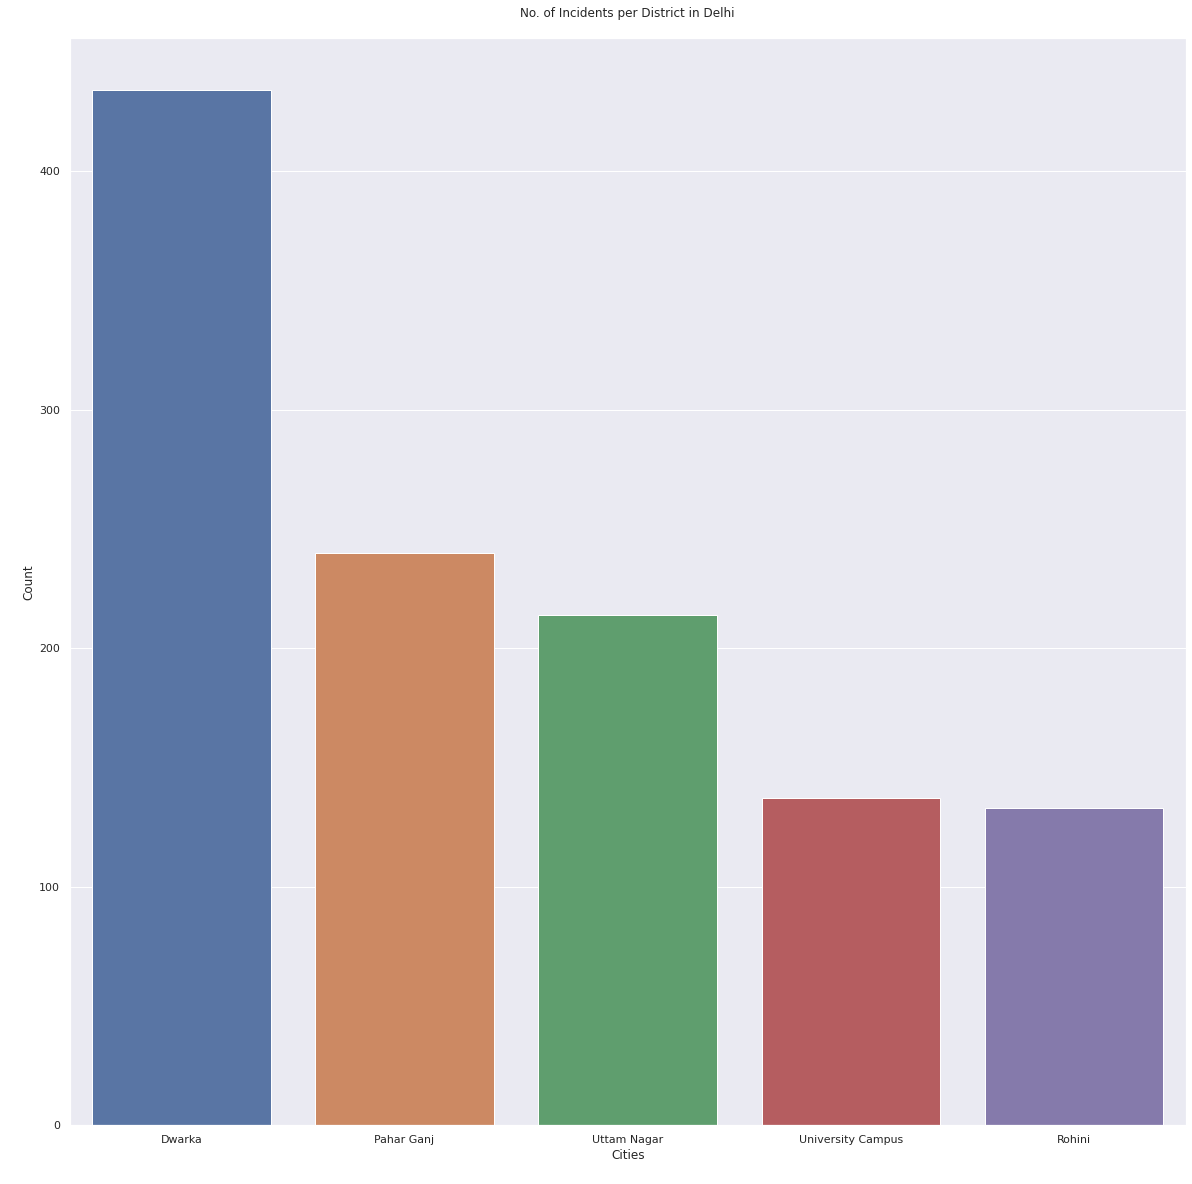

In [ ]:
data=dis1['DISTRICT'].value_counts()

#Selecting Top 5 District by incident count
sns.barplot(x=data.index[:5], y=data[:5])

plt.title('No. of Incidents per District in Delhi\n')
plt.ylabel("\nCount")
plt.xlabel('Cities\n')

Text(0.5, 0, 'Cities\n')

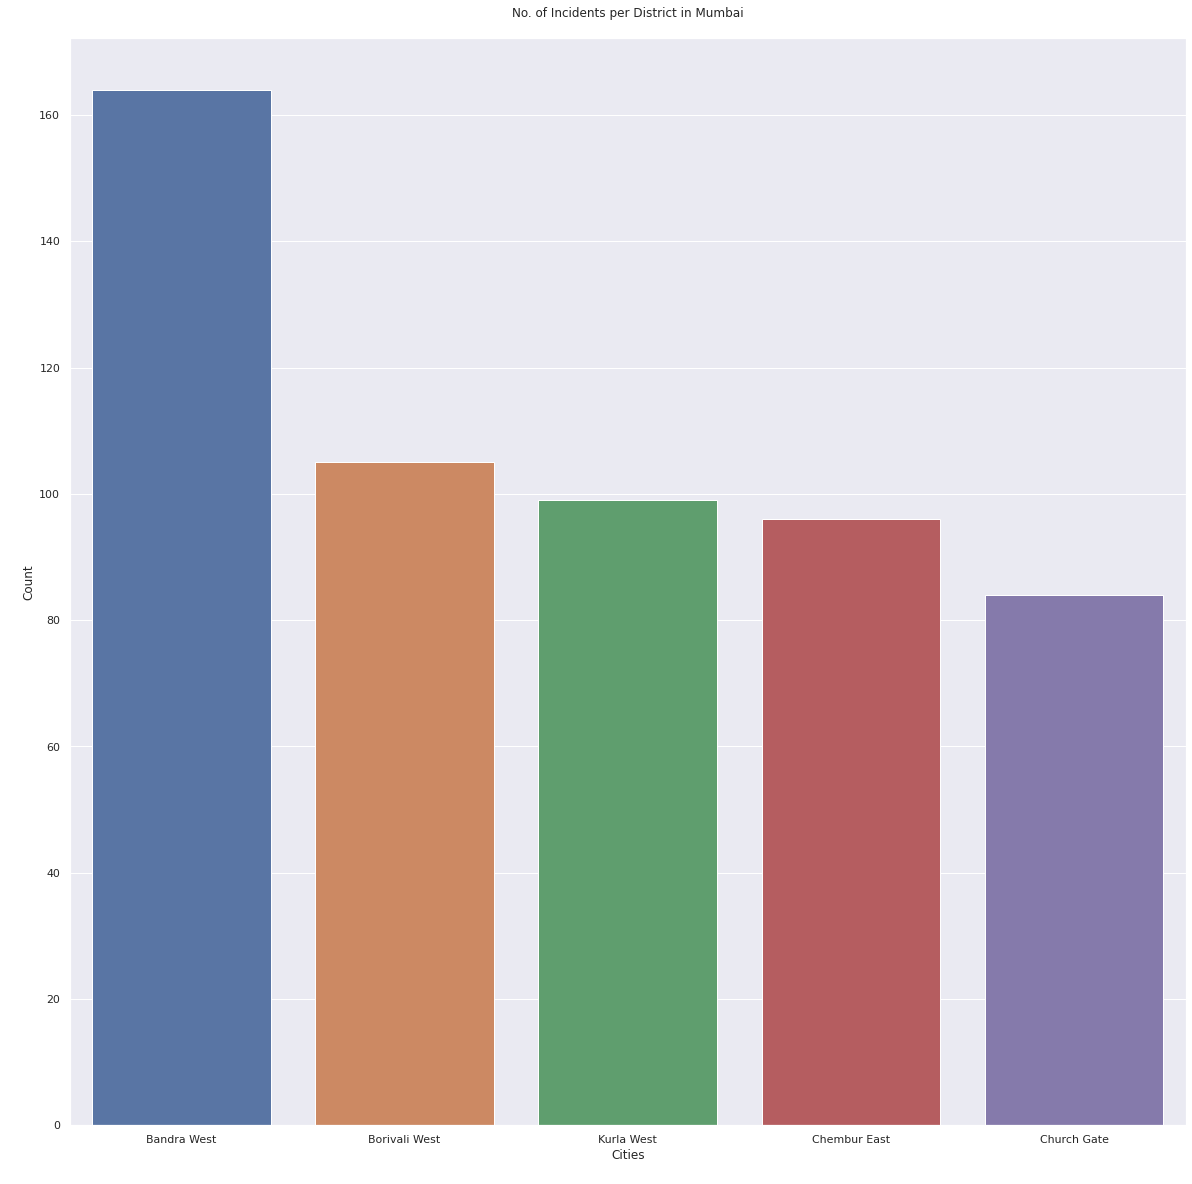

In [ ]:
dis2 = ct2[ct2['CITY'] == 'Mumbai']

data=dis2['DISTRICT'].value_counts()

#selecting top 5 district
sns.barplot(x=data.index[:5], y=data[:5])

plt.title('No. of Incidents per District in Mumbai\n')
plt.ylabel("\nCount")
plt.xlabel('Cities\n')

In [ ]:
#--------------Category----------------

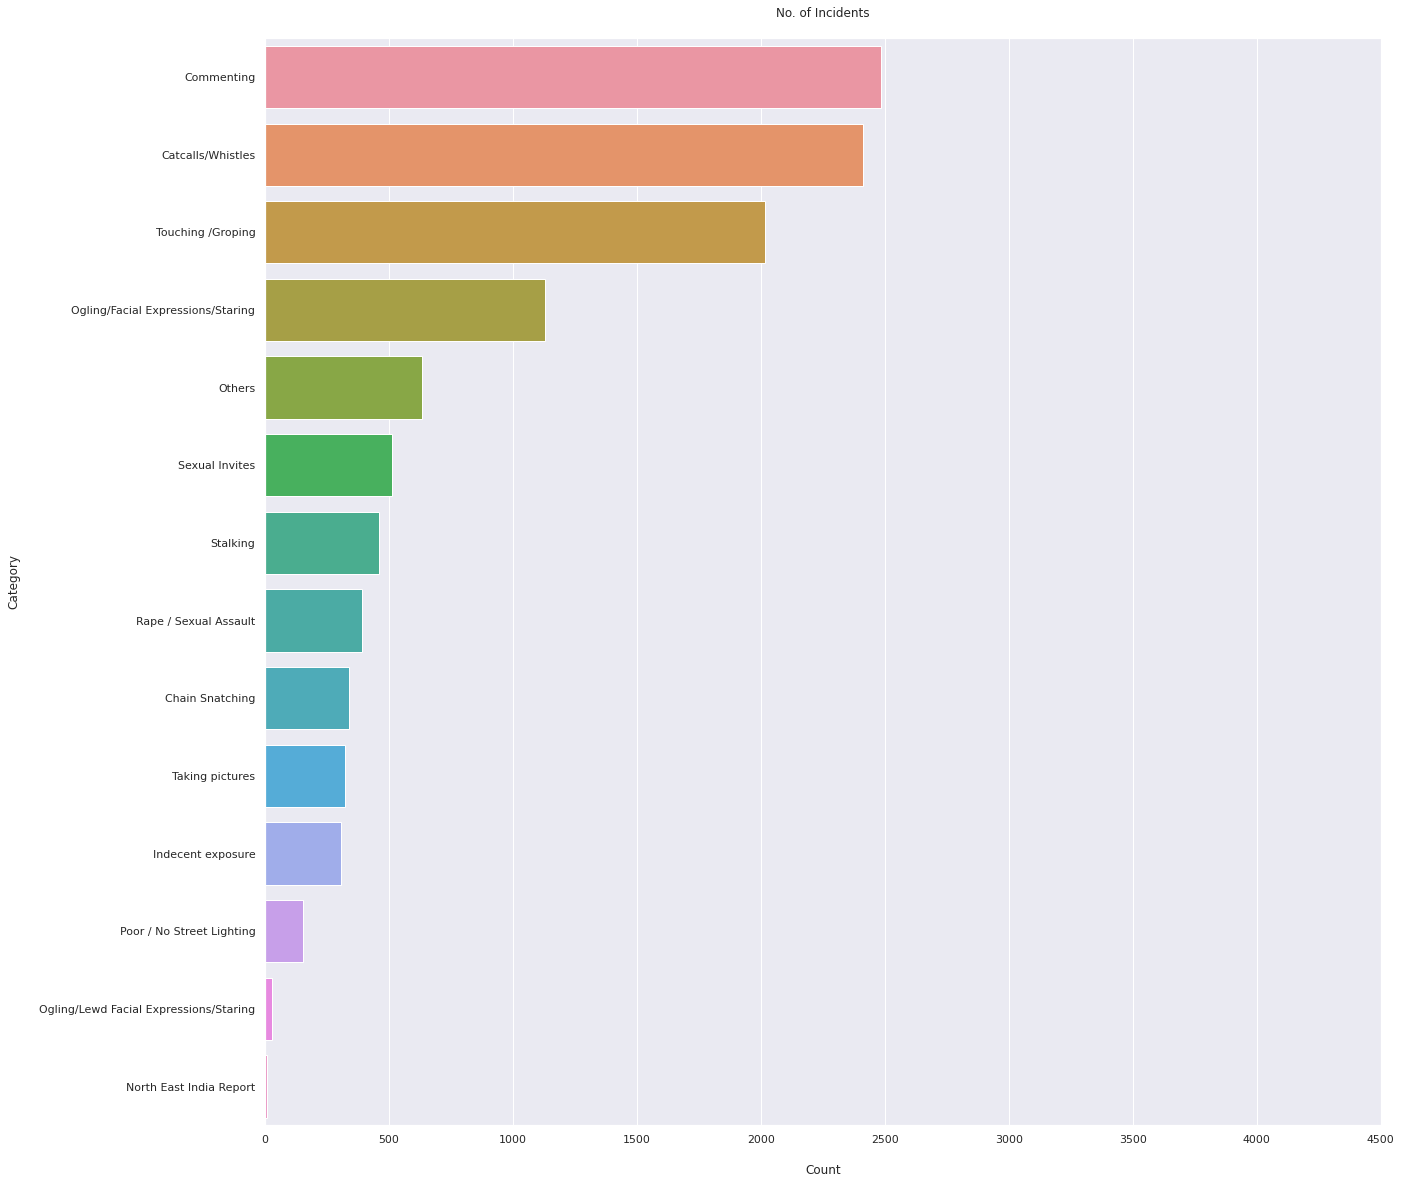

In [ ]:

data=ds1['CATEGORY'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,4500])
sns.barplot(y=data.index[:14], x=data[:14], orient='h')
plt.title('No. of Incidents\n')
plt.xlabel("\nCount")
plt.ylabel('Category\n')

    
plt.show()



In [ ]:
#----------------DATE & TIME-------------------------

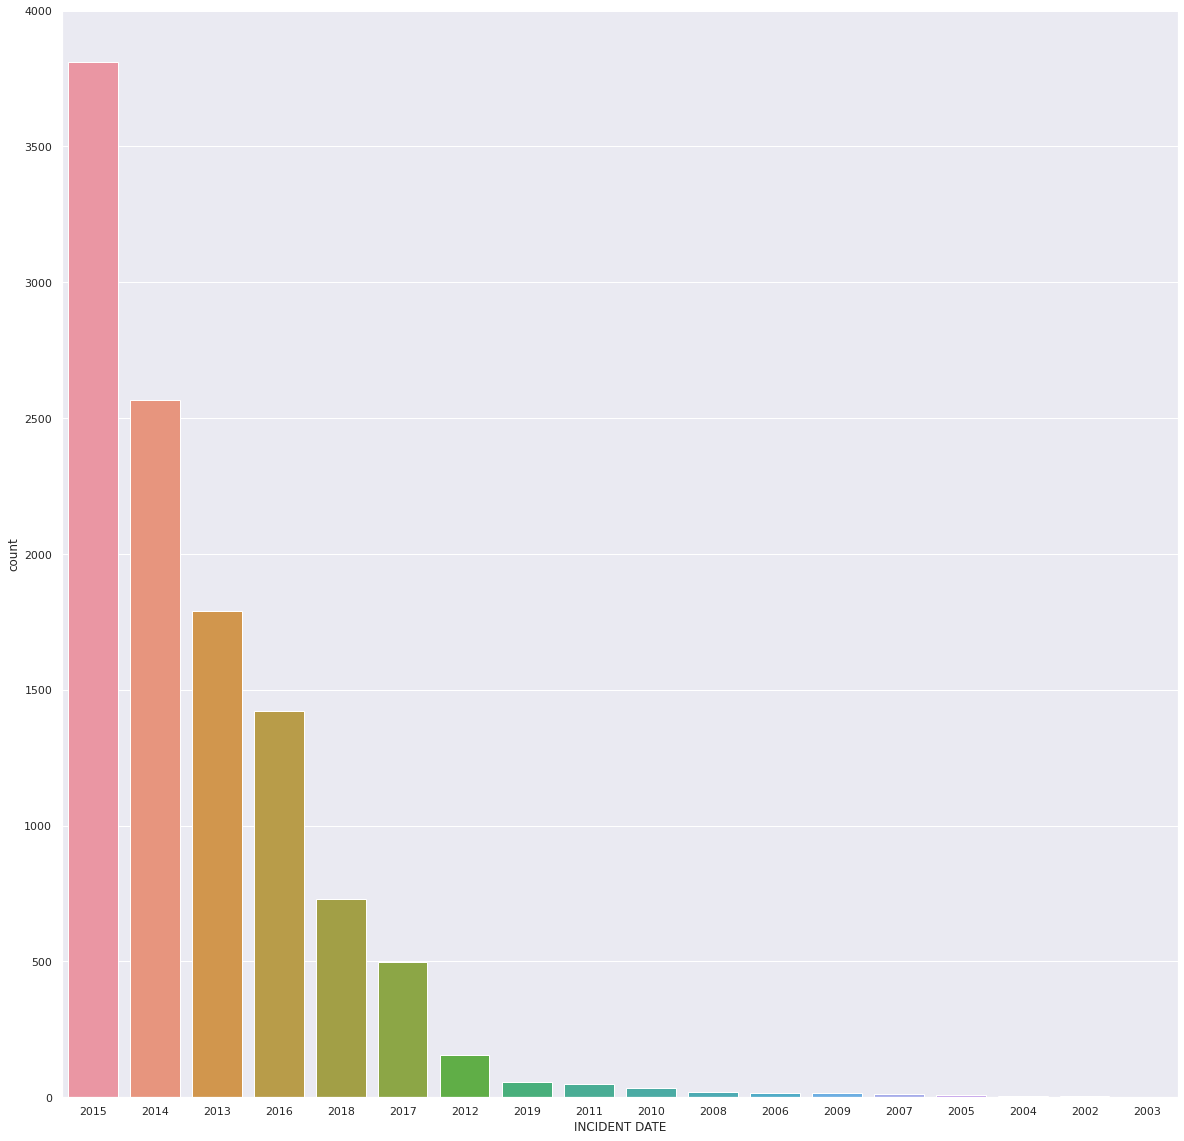

In [ ]:
ds1['INCIDENT DATE'] = pd.to_datetime(ds1['INCIDENT DATE'])

data = ds1['INCIDENT DATE'].dt.year 

sns.countplot(x=data, data=ds1 , order=data.value_counts().index )

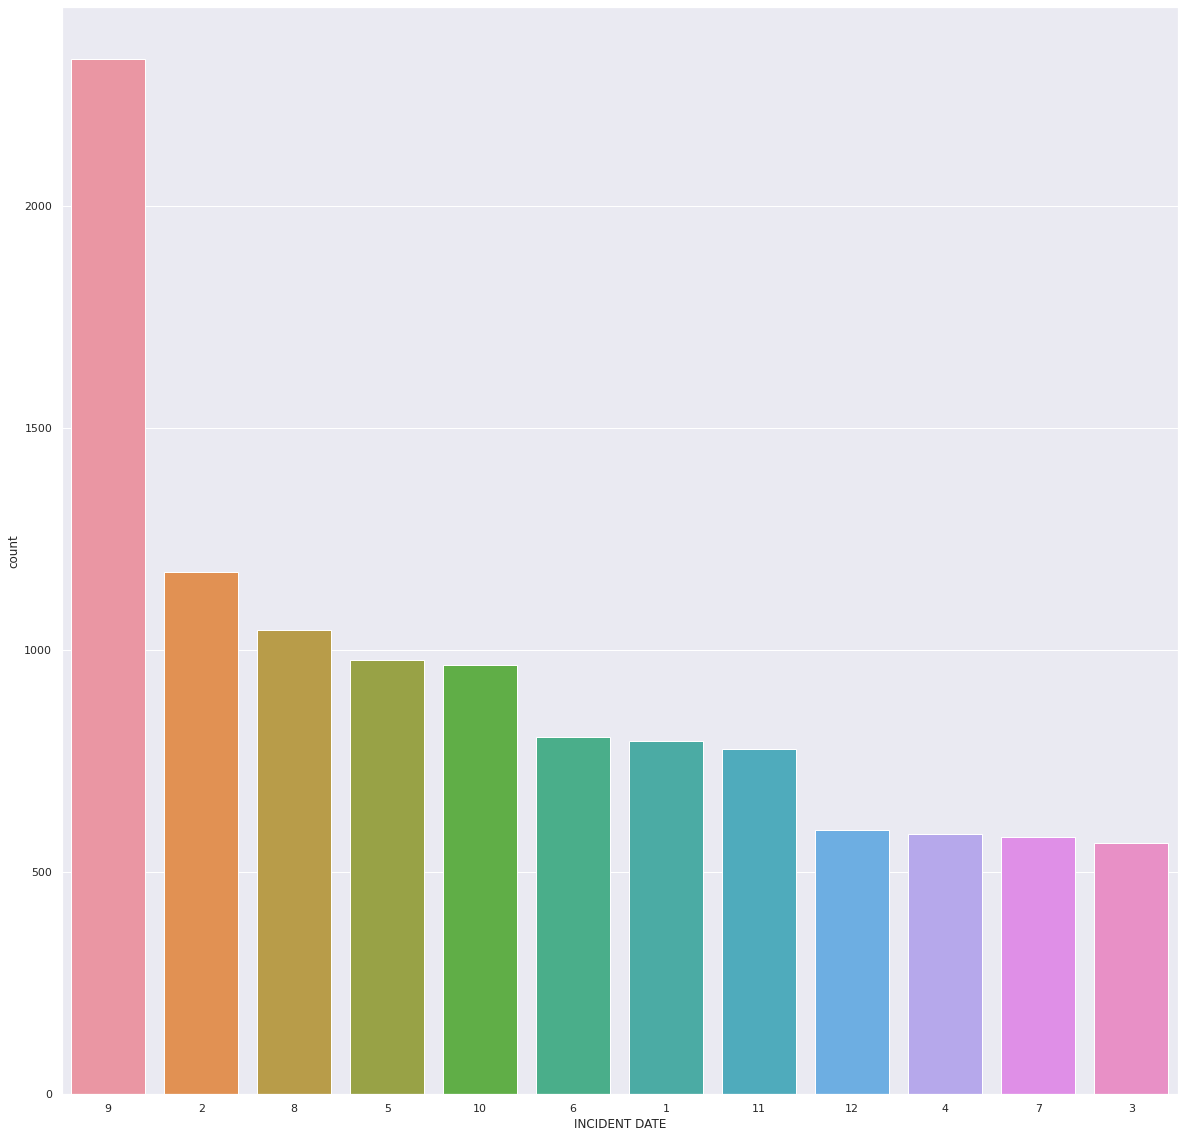

In [ ]:
data = ds1['INCIDENT DATE'].dt.month

sns.countplot(x=data ,data=ds1, order=data.value_counts().index)

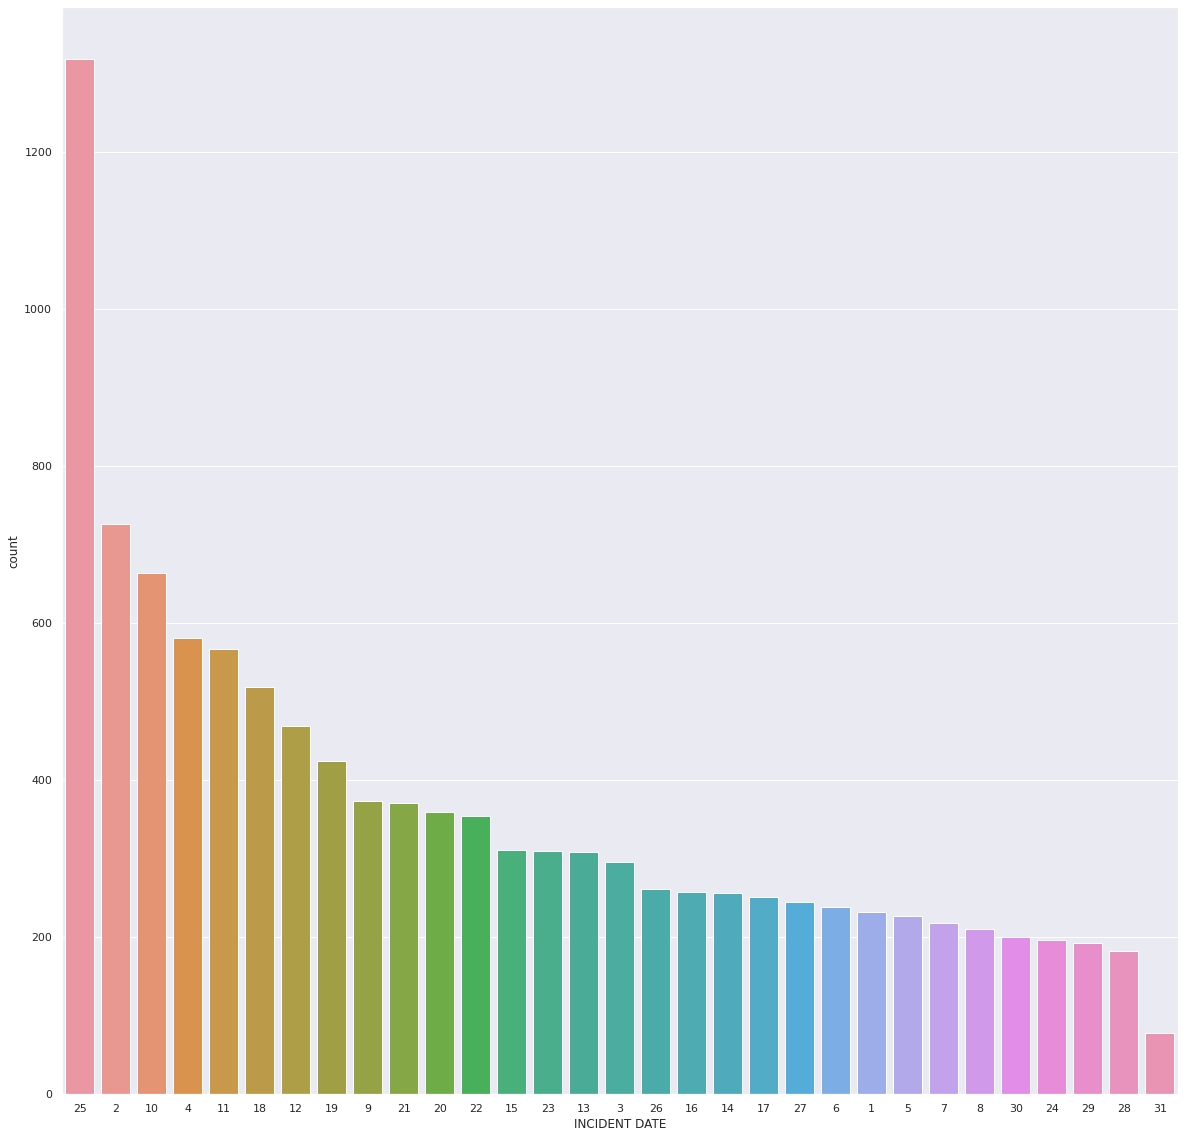

In [ ]:
data = ds1['INCIDENT DATE'].dt.day

sns.countplot(x=data, data=ds1, order=data.value_counts().index)

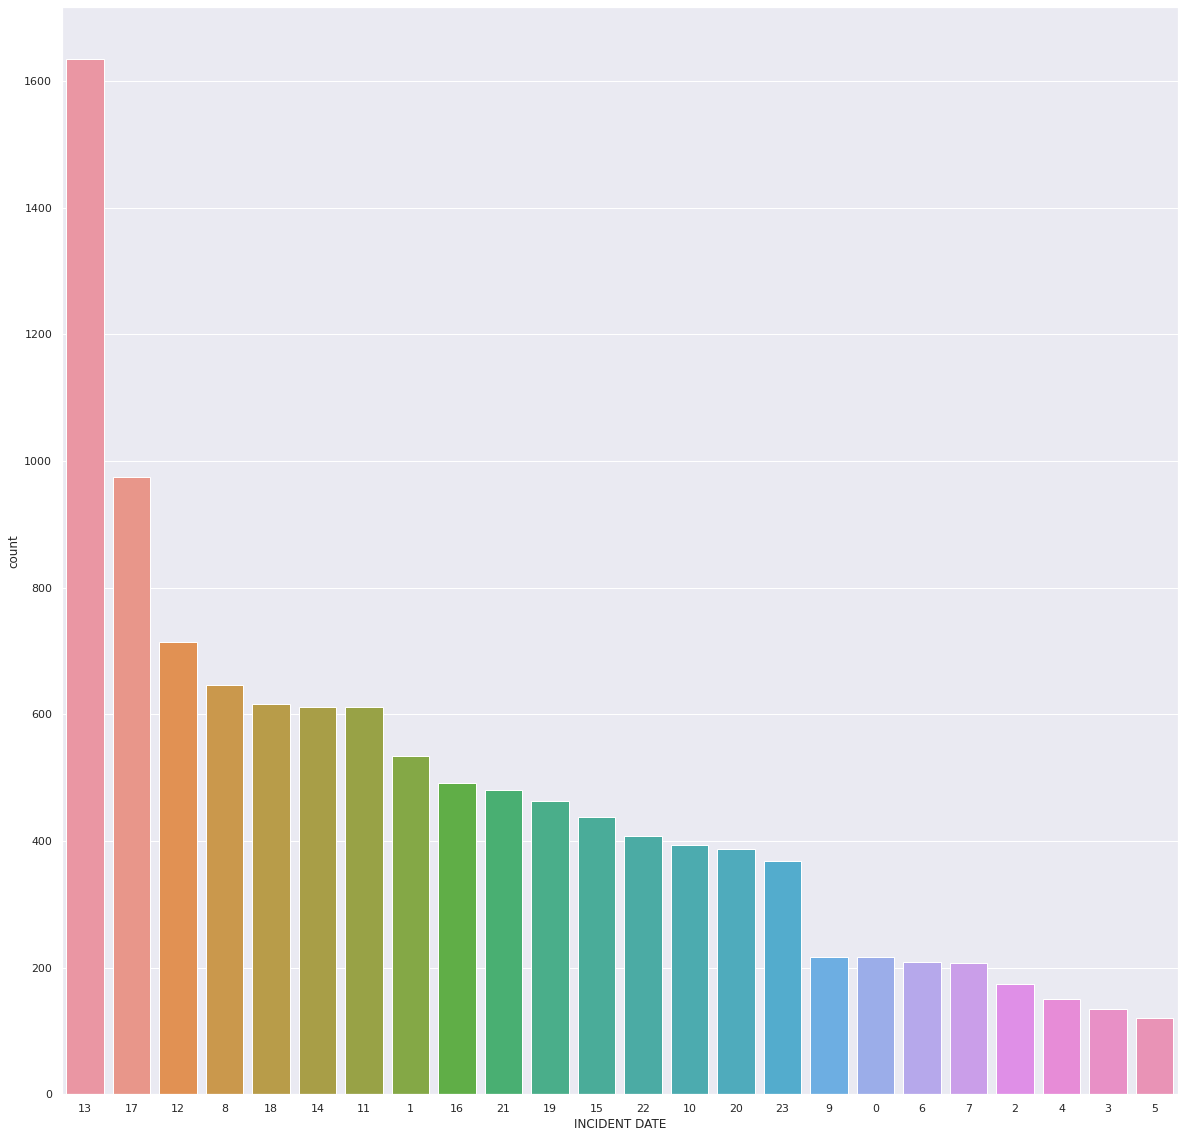

In [ ]:
data = ds1['INCIDENT DATE'].dt.hour
plt.xlabel("Incidental Hours")
sns.countplot(x=data, data=ds1 , order = data.value_counts().index)

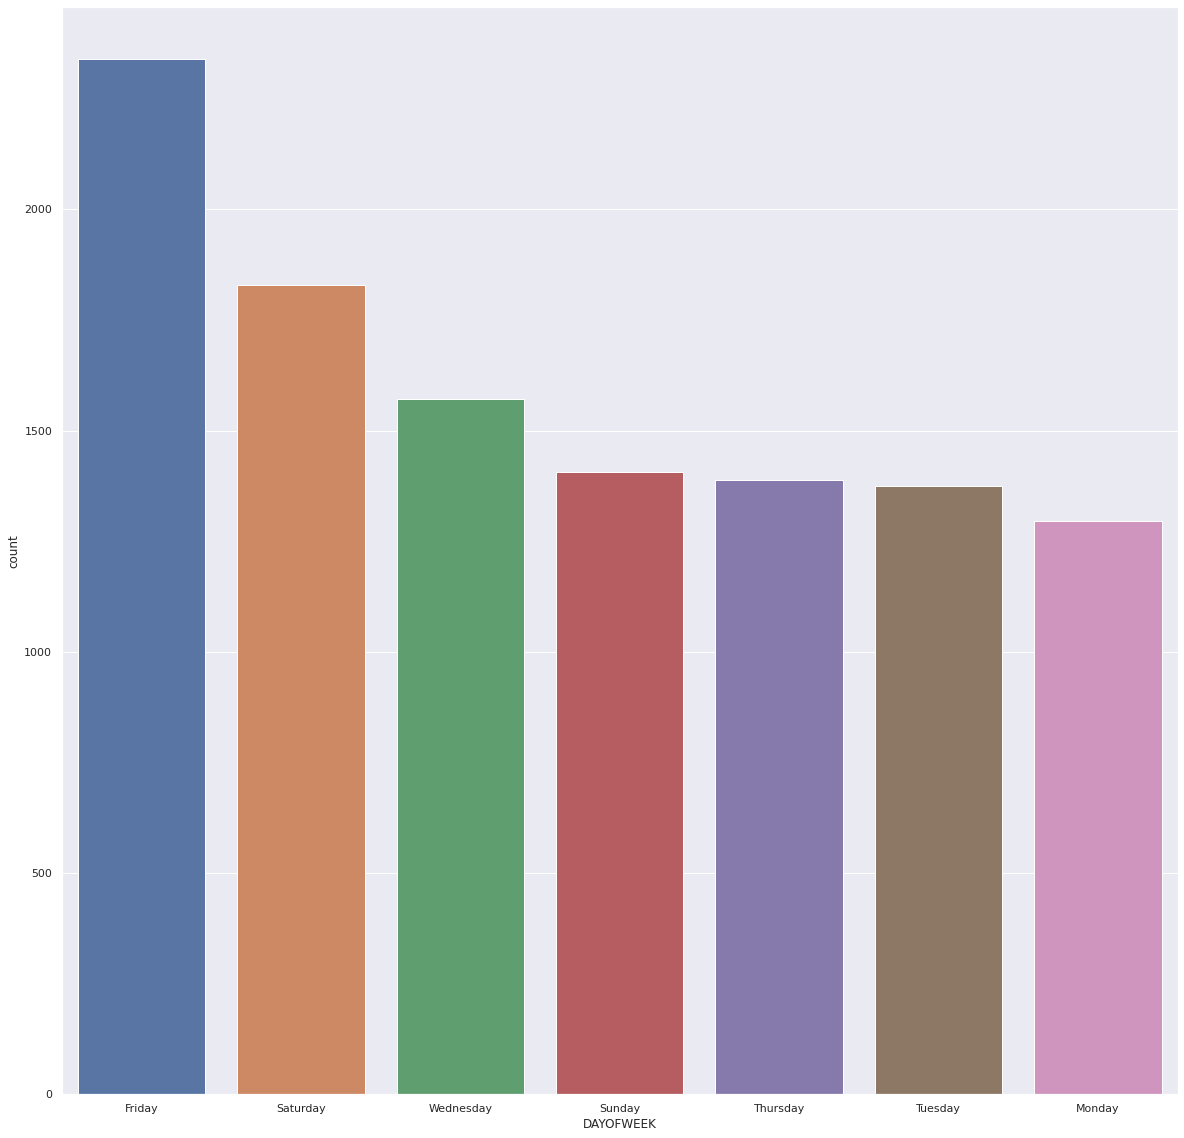

In [ ]:

sns.countplot(x=ds1['DAYOFWEEK'], data=ds1, order = ds1['DAYOFWEEK'].value_counts().index)

Plotting Data on World Map

In [ ]:
import folium 
#setting starting coordinates:
start_coord = [0,0]
#creating an empty map
maps = folium.Map(location=start_coord, tiles='OpenStreetMap', zoom_start=4)
df_heatmap=new.iloc[0:7800,:] #for faster processing 
for i in range(0,len(new)):
    folium.CircleMarker(
      location=[df_heatmap.iloc[i]['LATITUDE'], df_heatmap.iloc[i]
    ['LONGITUDE']],
      popup=" Latitude: {}<br> Longitude: {} Harassment category: {} <br> State : {}".format(df_heatmap.iloc[i]['LATITUDE'], df_heatmap.iloc[i]
     ['LONGITUDE'],df_heatmap.iloc[i]['CATEGORY'],df_heatmap.iloc[i]['STATE']),
      fill=True
   ).add_to(maps)

You can see the Map [Here](https://drive.google.com/file/d/1Ha6MHnq6Y5x1QqC8_FU4tNXAX1Osw_tz/view?usp=sharing)

**-----------------------------------------------------------**

Feature Selection for classification 
- Labeling Categories

In [ ]:
from io import StringIO
col= ['CATEGORY', 'DESCRIPTION']
ds1 = ds1[col]
ds1 = ds1[pd.notnull(ds1['DESCRIPTION'])]
ds1.columns = ['CATEGORY', 'DESCRIPTION']
ds1['CATEGORY_ID'] = ds1['CATEGORY'].factorize()[0]
CATEGORY_ID_ds1 = ds1[['CATEGORY', 'CATEGORY_ID']].drop_duplicates().sort_values('CATEGORY_ID')
CATEGORY_TO_ID = dict(CATEGORY_ID_ds1.values)
ID_TO_CATEGORY = dict(CATEGORY_ID_ds1[['CATEGORY_ID', 'CATEGORY']].values)
ds1.head()

,CATEGORY,DESCRIPTION,CATEGORY_ID
0,"Touching /Groping,",My school auto driver always use to stare at m...,0
1,"Catcalls/Whistles,",I was in market with my mom. There I saw a man...,1
2,"Sexual Invites,",there is a girl whom boys have been writing a ...,2
3,"Sexual Invites,",there is a girl who is being disturbed y a bo...,2
4,"Sexual Invites,",there are some boys who likes disturbing a gir...,2


Using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(ds1.DESCRIPTION).toarray()
labels = ds1.CATEGORY_ID
features.shape


(2411, 990)

Trying Different Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_ds1 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_ds1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_ds1.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.490005
LogisticRegression        0.516689
MultinomialNB             0.445771
RandomForestClassifier    0.329896
Name: accuracy, dtype: float64

Plotting results

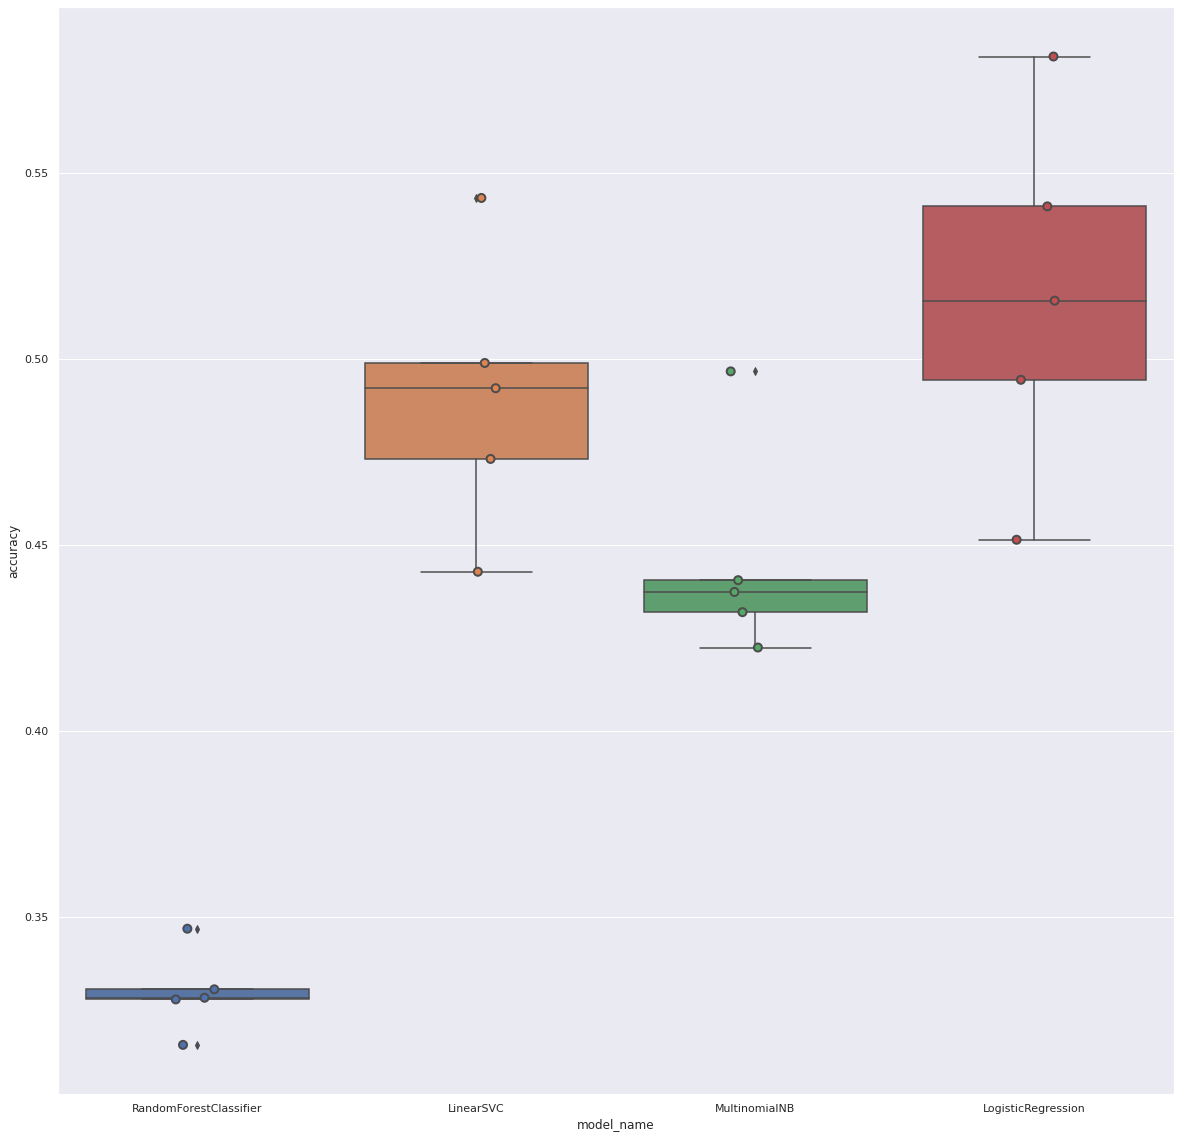

In [ ]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_ds1)
sns.stripplot(x='model_name', y='accuracy', data=cv_ds1, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

Trying SVC

In [ ]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, ds1.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Generating Confusion Matrix for the Prediction Accuracy

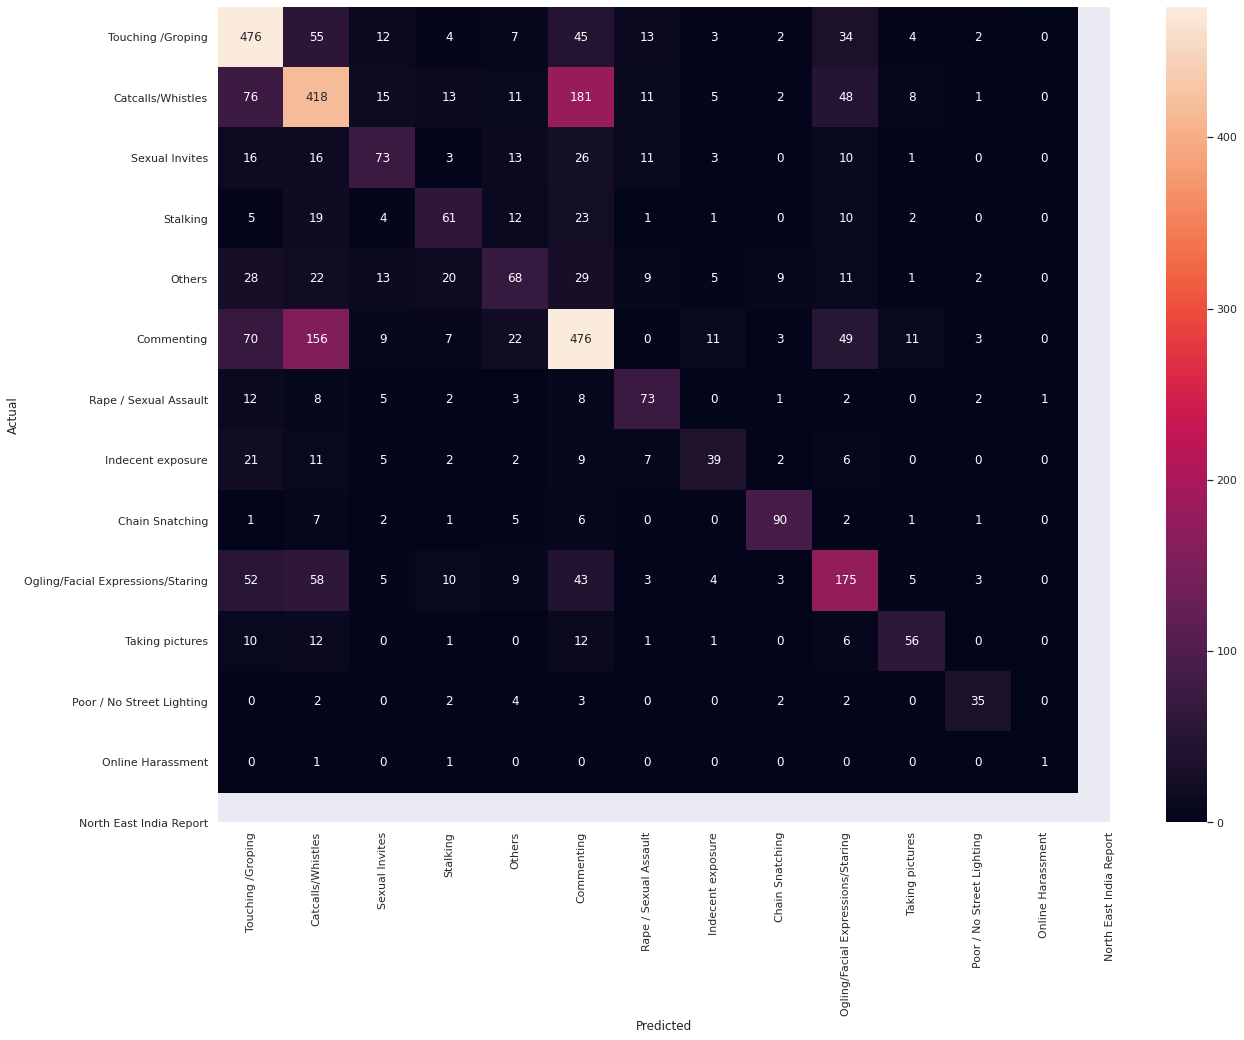

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=CATEGORY_ID_ds1.CATEGORY.values, yticklabels=CATEGORY_ID_ds1.CATEGORY.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Displaying Actual and Pridicted Categories

In [ ]:
from IPython.display import display

for predicted in CATEGORY_ID_ds1.CATEGORY_ID:
  for actual in CATEGORY_ID_ds1.CATEGORY_ID:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(ID_TO_CATEGORY[actual], ID_TO_CATEGORY[predicted], conf_mat[actual, predicted]))
      display(ds1.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['CATEGORY', 'DESCRIPTION']])
      print('')

Generating Unigrams & Bigrams for Categories

In [ ]:
from sklearn.feature_selection import chi2

N = 2
for CATEGORY, CATEGORY_ID in sorted(CATEGORY_TO_ID.items()):
  indices = np.argsort(model.coef_[CATEGORY_ID])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(CATEGORY))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Catcalls/Whistles':
  . Top unigrams:
       . whistling
       . whistled
  . Top bigrams:
       . harassment catcalls
       . comments indecent
# 'Chain Snatching':
  . Top unigrams:
       . chain
       . snatched
  . Top bigrams:
       . snatching commenting
       . snatch chain
# 'Commenting':
  . Top unigrams:
       . comment
       . comments
  . Top bigrams:
       . guys commented
       . groping commenting
# 'Indecent exposure':
  . Top unigrams:
       . masturbating
       . flashed
  . Top bigrams:
       . opened zip
       . man showed
# 'North East India Report':
  . Top unigrams:
       . india
       . indian
  . Top bigrams:
       . friend tried
       . local people
# 'Ogling/Facial Expressions/Staring':
  . Top unigrams:
       . ogling
       . winked
  . Top bigrams:
       . staring inappropriate
       . commenting whistling
# 'Online Harassment':
  . Top unigrams:
       . reported
       . touching
  . Top bigrams:
       . pictures touching
      

Testing model for random input

In [ ]:
texts = ["He invited me as he watched porn and misbehaved.",
         "Felt that someone touched my boobs while I was travelling in a bus",
         "He brutally raped me."]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(ID_TO_CATEGORY[predicted]))
  print("")

"He invited me as he watched porn and misbehaved."
  - Predicted as: 'Commenting'

"Felt that someone touched my boobs while I was travelling in a bus"
  - Predicted as: 'Touching /Groping'

"He brutally raped me."
  - Predicted as: 'Rape / Sexual Assault'



Generating Precision Matrix for Test data 

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    labels = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       657
           1       0.53      0.53      0.53       789
           2       0.51      0.42      0.46       172
           3       0.48      0.44      0.46       138
           4       0.44      0.31      0.36       217
           5       0.55      0.58      0.57       817
           6       0.57      0.62      0.59       117
           7       0.54      0.38      0.44       104
           8       0.79      0.78      0.78       116
           9       0.49      0.47      0.48       370
          10       0.63      0.57      0.60        99
          11       0.71      0.70      0.71        50
          12       0.00      0.00      0.00         0
          13       0.50      0.33      0.40         3

   micro avg       0.56      0.56      0.56      3649
   macro avg       0.53      0.49      0.50      3649
weighted avg       0.55      0.56      0.55      3649



Using PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2000)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

In [ ]:
print("train with old features: ",np.array(X_train).shape)
print("train with new features:" ,np.array(X_train_new).shape)

print("test with old features: ",np.array(X_test).shape)
print("test with new features:" ,np.array(X_test_new).shape)

train with old features:  (7406, 4620)
train with new features: (7406, 2000)
test with old features:  (3649, 4620)
test with new features: (3649, 2000)


Train Test Split After Using PCA

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(ds1['DESCRIPTION'], ds1['CATEGORY'], test_size=0.33, random_state = 0)
X_train_tfidf_new = tfidf.fit_transform(X_train_counts_new).toarray()
clf = MultinomialNB().fit(X_train_tfidf_new, y_train)

Applying Different Models

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_ds1 = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_ds1 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

Results After using PCA

In [ ]:
cv_ds1.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.394990
LogisticRegression        0.403758
MultinomialNB             0.327209
RandomForestClassifier    0.179819
Name: accuracy, dtype: float64

Trying GridSearchCV

In [ ]:
tfidf_vect=TfidfVectorizer(smooth_idf=True,use_idf=True,stop_words='english',sublinear_tf=True,min_df=5) 

X_train, X_test, y_train, y_test = train_test_split(ds1['DESCRIPTION'], ds1['CATEGORY_ID'], test_size=0.30, random_state = 5)

X_train_tfidf = tfidf_vect.fit_transform(X_train)
train = X_train_tfidf.toarray()

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [0.8,1,2],
            'kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [15,20,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.9,1,1.2,10],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty' : ['l2']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Score After Using GridSearchCV

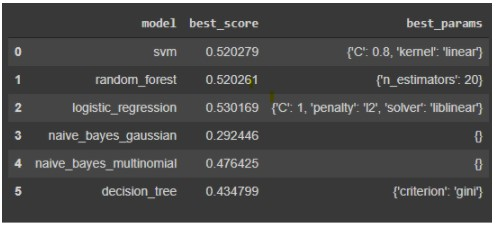

Using RepeatedStratifiedKFold

LogisticRegression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
lin = pd.DataFrame(means)
lin['Parameteres'] = params
lin.columns = ['Accuracy','Parameter']

In [ ]:
lin

,Accuracy,Parameter
0,0.488911,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-..."
1,0.492933,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}"
2,0.504236,"{'C': 100, 'penalty': 'l2', 'solver': 'libline..."
3,0.522149,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}"
4,0.522516,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"
5,0.532346,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
6,0.533409,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-..."
7,0.533409,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
8,0.530128,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline..."
9,0.385185,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-..."


RidgeClassifier

In [ ]:


from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [1.0,1.1,1.2,1.5,1.6,1.8,1.9]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ridge = pd.DataFrame(means)
ridge['Parameteres'] = params
ridge.columns = ['Accuracy','Parameter']

Best: 0.553528 using {'alpha': 1.8}


In [ ]:
ridge

,Accuracy,Parameter
0,0.545493,{'alpha': 1.0}
1,0.546226,{'alpha': 1.1}
2,0.546592,{'alpha': 1.2}
3,0.552062,{'alpha': 1.5}
4,0.553165,{'alpha': 1.6}
5,0.553528,{'alpha': 1.8}
6,0.553161,{'alpha': 1.9}


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
knn = pd.DataFrame(means)
knn['Parameteres'] = params
knn.columns = ['Accuracy','Parameter']


Best: 0.381128 using {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


SVC

In [ ]:

from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
svc = pd.DataFrame(means)
svc['Parameteres'] = params
svc.columns = ['Accuracy','Parameter']


Best: 0.529392 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svc

,Accuracy,Parameter
0,0.342849,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}"
1,0.520656,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.444724,"{'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}"
3,0.466977,"{'C': 50, 'gamma': 'scale', 'kernel': 'linear'}"
4,0.416945,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}"
5,0.520656,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
6,0.472846,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}"
7,0.481589,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
8,0.433405,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}"
9,0.517702,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"


BaggingClassifier

In [ ]:

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
n_estimators = [800,950,1000,1100,1200]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
bag = pd.DataFrame(means)
bag['Parameteres'] = params
bag.columns = ['Accuracy','Parameter']

Best: 0.530168 using {'n_estimators': 950}


RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [100, 1000,1100,1200]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
rfc = pd.DataFrame(means)
rfc['Parameteres'] = params
rfc.columns = ['Accuracy','Parameter']


Best: 0.560093 using {'max_features': 'log2', 'n_estimators': 1000}


GradientBoostingClassifier

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10,50,100]
learning_rate = [0.01,0.1,1]
subsample = [0.7,0.9,1,1.2]
max_depth = [3,5,7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
gbc = pd.DataFrame(means)
gbc['Parameteres'] = params
gbc.columns = ['Accuracy','Parameter']

Best: 0.273222 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
gbc

,Accuracy,Parameter
0,0.207237,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
1,0.273222,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
2,0.224534,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
3,0.229722,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


Plotting Accuracy for different Models

In [ ]:
model = ['LogisticRegression','RidgeClassifier','KNeighbor','SVC','BaggingClassifier','RFC','GradientBoosting']
acc = [0.533409,0.553528,0.381128,0.529392,0.530168,0.560093,0.273222]
d = {'Model':model,'Acc':acc}
kfold = pd.DataFrame(d)

Text(0.5, 1.0, 'RepeatedStratifiedKFold & GridSearchCV')

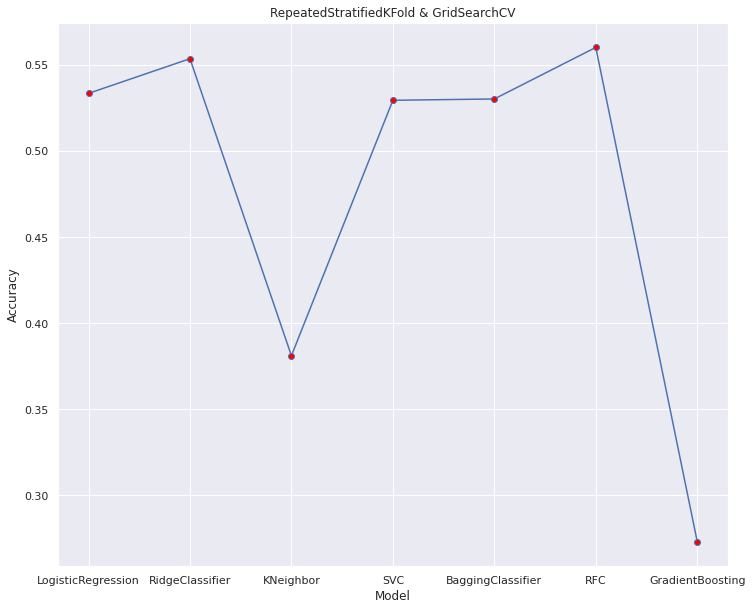

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(kfold.Model,kfold.Acc,marker='o', markerfacecolor='red')
# naming the x axis
plt.xlabel('Model')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
plt.title('RepeatedStratifiedKFold & GridSearchCV')

Comparing Accuracy before and after Using RepeatedStratifiedKFold

In [ ]:
model = ['LinearSVC','LogisticRegression','RFC']
acc = [0.520279,0.530169,0.520261]
d = {'Model':model,'Acc':acc}
after = pd.DataFrame(d)

In [ ]:
model = ['LinearSVC','LogisticRegression','RFC']
acc = [0.529392,0.533409,0.560093]
d = {'Model':model,'Acc':acc}
afterr = pd.DataFrame(d)

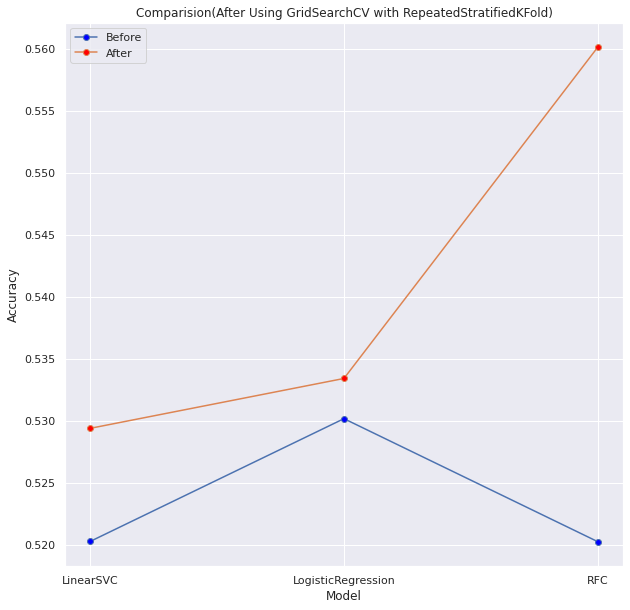

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(after.Model,after.Acc, label='Before',marker='o', markerfacecolor='blue')
plt.plot(afterr.Model,afterr.Acc, label= 'After',marker='o', markerfacecolor='red')
# naming the x axis
plt.xlabel('Model')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
plt.title('Comparision(After Using GridSearchCV with RepeatedStratifiedKFold)')
  
# show a legend on the plot
plt.legend()